   X   Y
0  1   4
1  2   6
2  3   9
3  4  11
4  5  18


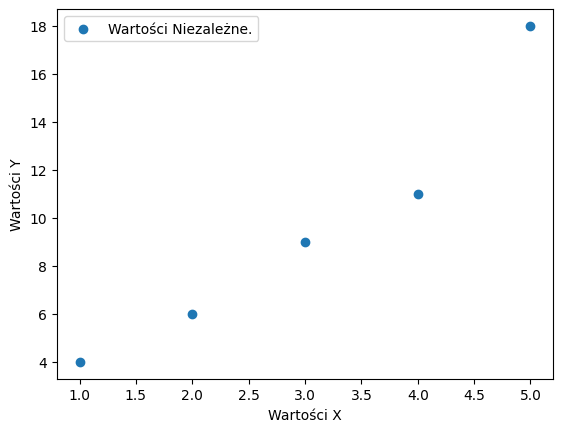

Mean x: 3.0
Mean y: 9.6
passed - test_1
passed - test_2
Standard deviation x: 1.5811388300841898
Standard deviation y: 5.412947441089743
n =  5

      X   Y  y^2  x*y  x^2
0     1   4   16    4    1
1     2   6   36   12    4
2     3   9   81   27    9
3     4  11  121   44   16
4     5  18  324   90   25
sum  15  48  578  177   55
r =  0.963940292431027


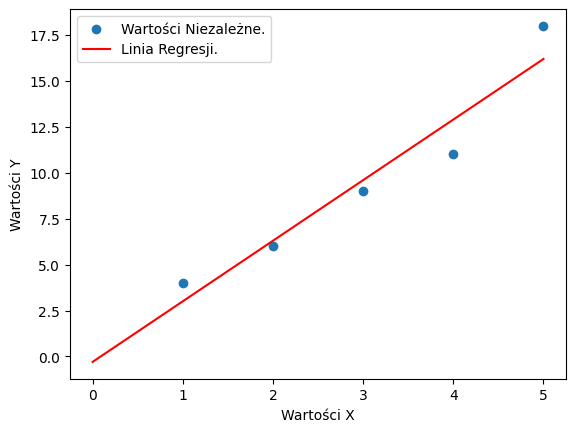

     X     Y
0  1.0   4.0
1  2.0   6.0
2  3.0   9.0
3  4.0  11.0
4  5.0  18.0
5  6.0   NaN
     X     Y
0  1.0   4.0
1  2.0   6.0
2  3.0   9.0
3  4.0  11.0
4  5.0  18.0
5  6.0  19.5
     X     Y
0  1.0   4.0
1  2.0   6.0
2  3.0   9.0
3  4.0  11.0
4  5.0  18.0
5  6.0  19.5
6  7.0  22.8
7  8.0  26.1


In [8]:
from math import sqrt
from typing import List, Union

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


def mean(numbers: List[Union[int, float]]) -> float:
    result: float = 0
    for num in numbers:
        result += num

    return result / len(numbers)


def standard_deviation(numbers: List[Union[int, float]]) -> float:
    tmp: float = 0
    m: float = 0
    m = mean(numbers)

    for num in numbers:
        tmp += (num - m) ** 2

    return sqrt(tmp / (len(numbers) - 1))


def pearson_correlation_coefficient(*args) -> float:
    n, x_y, x, y, x_x, y_y = args

    return (n * x_y - x * y) / sqrt((n * x_x - x**2) * (n * y_y - y**2))


def regression_line(x: float, b: float, a: float) -> float:
    return (b * x) + a


def predict_y(x: float, b: float, a: float) -> float:
    return (b * x) + a


X: List[int] = [1, 2, 3, 4, 5]
Y: List[int] = [4, 6, 9, 11, 18]

df = pd.DataFrame()
df["X"] = X
df["Y"] = Y
print(df)

plt.scatter(df["X"], df["Y"], label="Wartości Niezależne.")
plt.xlabel("Wartości X")
plt.ylabel("Wartości Y")
plt.legend()
plt.show()

Mean_x = mean(df["X"])
Mean_y = mean(df["Y"])
print("Mean x:", Mean_x)
print("Mean y:", Mean_y)

# check
mean_x = np.mean(df["X"])
mean_y = np.mean(df["Y"])
try:
    assert Mean_x == mean_x, "Mean_x is not equal mean_x"
    print("passed - test_1")
    assert Mean_y == mean_y, "Mean_y is not equal mean_y"
    print("passed - test_2")
except AssertionError as e:
    print("failed -", e)

Sx = standard_deviation(df["X"])
Sy = standard_deviation(df["Y"])
print("Standard deviation x:", Sx)
print("Standard deviation y:", Sy)

n: int = len(df["X"])

pearson = pd.DataFrame(df[:])
pearson["y^2"] = df["Y"] * df["Y"]
pearson["x*y"] = df["X"] * df["Y"]
pearson["x^2"] = df["X"] * df["X"]
pearson["y^2"] = df["Y"] * df["Y"]
pearson.loc["sum"] = pearson.sum()

print("n = ", n)
print()
print(pearson)

x_y = pearson["x*y"]["sum"]
x = pearson["X"]["sum"]
y = pearson["Y"]["sum"]
x_x = pearson["x^2"]["sum"]
y_y = pearson["y^2"]["sum"]

r: float = pearson_correlation_coefficient(n, x_y, x, y, x_x, y_y)
print("r = ", r)

b: float = r * (Sy / Sx)
a: float = Mean_y - (b * Mean_x)

lin_space: List[float] = np.linspace(0, 5, 1000)
plt.scatter(df["X"], df["Y"], label="Wartości Niezależne.")
plt.plot(lin_space, regression_line(lin_space, b, a), "r", label="Linia Regresji.")
plt.xlabel("Wartości X")
plt.ylabel("Wartości Y")
plt.legend()
plt.show()

df = df._append({"X": 6, "Y": np.nan}, ignore_index=True)
print(df)

df.at[5, "Y"] = predict_y(df["X"][5], b, a)
print(df)

# predict for X = 7, X = 8
df = df._append([{"X": 7, "Y": np.nan}, {"X": 8, "Y": np.nan}], ignore_index=True)
df.at[6, "Y"] = predict_y(df["X"][6], b, a)
df.at[7, "Y"] = predict_y(df["X"][7], b, a)
print(df)
